# Week 9 - Multivariate Analysis, part 2

# 1. Lesson - no lesson this week

# 2. Weekly graph question

The graph below plots the first two principal component scores in a scatter plot.  What can be said about the three outliers in the upper left corner of the graph?  Is their first principal component score high or low?  What about their second principal component score?  What does that mean about their values in series_1, series_2, and series_3?  It seems to me that you can say something about series_3 (what can you say?) but you may have a harder time saying something about series_1 and series_2, and an almost impossible time saying anything about the relative values of series_1 and series_2.  Why is that?  How are series_1 and series_2 related, according to how they were created?  If you like, try drawing a pairplot for all three series and see what you get.

Overall, what are the advantages and disadvantages of the graph below?  Does it show anything interesting?

[0.79916477 0.18990532 0.01092991]
[[ 0.26541493  0.30096233  0.91595665]
 [ 0.60337553  0.6891417  -0.40127506]
 [ 0.75199261 -0.65917023 -0.00131519]]


Text(0, 0.5, 'Second Principal Component Score')

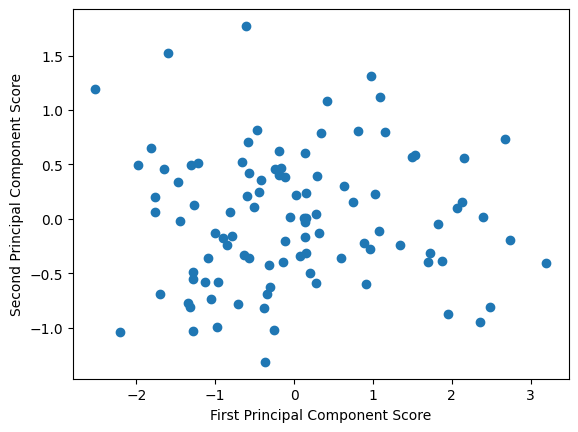

In [75]:
import numpy as np
import pandas as pd
from sklearn import decomposition
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

np.random.seed(0)
num_points = 100
series_1 = np.random.normal(loc = 2, scale = 0.5, size = num_points)
series_2 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.1, size = num_points))
series_3 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.5, size = num_points))
df = pd.DataFrame({'ser1': series_1, 'ser2': series_2, 'ser3': series_3})
df = df - df.mean() # set mean to zero, so we don't have to subtract mean from the principal component scores

pca3 = decomposition.PCA(n_components = 3)
pca3.fit(df)
print(pca3.explained_variance_ratio_)
print(pca3.components_)

first_principal_component_score = df.dot(pca3.components_[0])
second_principal_component_score = df.dot(pca3.components_[1])
plt.scatter(first_principal_component_score, second_principal_component_score)
plt.xlabel("First Principal Component Score")
plt.ylabel("Second Principal Component Score")

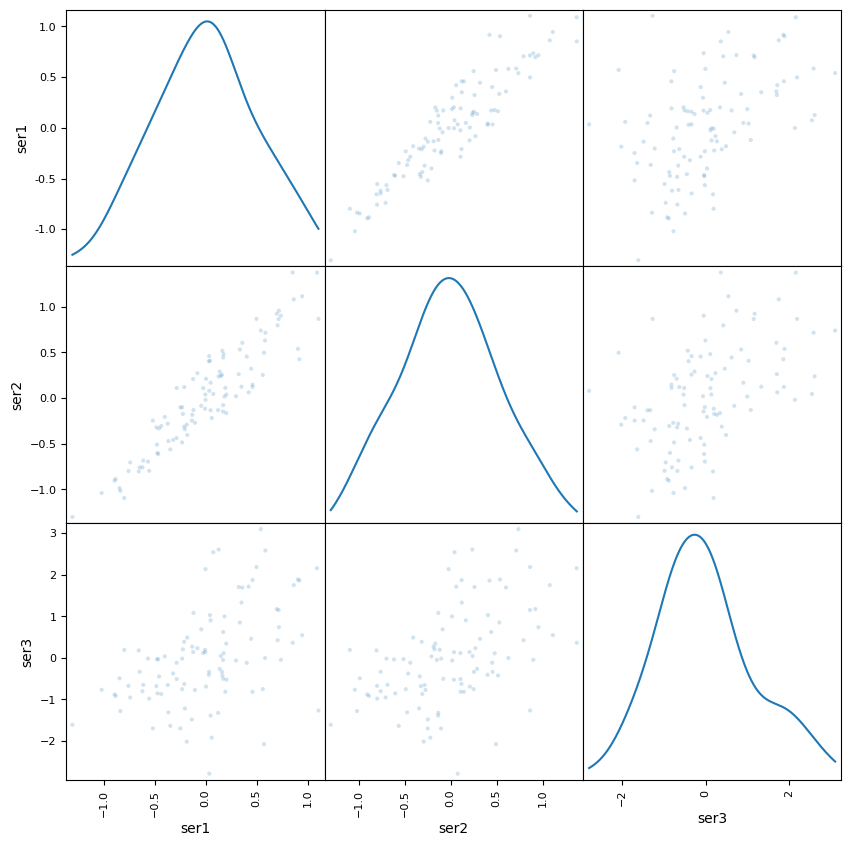

In [76]:
#draw a pair plot for the original data
pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(10, 10), diagonal='kde')
plt.show()

# Observations from the 3 PCA components of the dataset
- First principle component explains 79.9% of the variance in the dataset.
- Second principle component explains 19.9% of the variance in the dataset. 
- upper left corner points in the scatter plot of (PCA1 Vs PCA2) shows the data points that were negatively deviating for PC1 and positively deviating for PC2 in the direction of the variance.
- from the pair plot it was evident that series1 and series2 are highly correlated.series3 is not correlated with either series1 or series2.

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

Here are some types of analysis you can do:
Draw heatmaps.

Draw bubble plots.

Perform Principal Component Analysis to find out the directions in which the data varies.  Can you represent the data using only its projection onto its first principal component, using the methods described in Week 8?  How much of the variance would this capture?

Try performing linear regression analysis using different sets of features.  Which features seem most likely to be useful to predict other features?

Conclusions:
Explain what conclusions you would draw from this analysis: are the data what you expect? Are the data likely to be usable? If the data are not useable, find some new data!

Do you see any outliers? (Data points that are far from the rest of the data).

Does the Principal Component Analysis suggest a way to represent the data using fewer dimensions than usual - using its first one or two principal component scores, perhaps?

Try using your correlation information from previous weeks to help choose features for linear regression.

In [77]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rodsaldanha/arketing-campaign")

print("Path to dataset files:", path)
df_marketing_campaign = pd.read_csv(path + "/marketing_campaign.csv", sep=';')
df_marketing_campaign.head()

Path to dataset files: /Users/sudeemangalwadekar/.cache/kagglehub/datasets/rodsaldanha/arketing-campaign/versions/8


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [78]:
df_marketing_campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

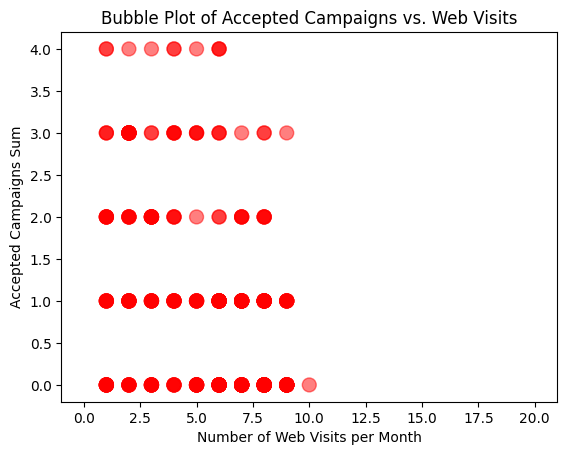

In [79]:
#calculate a sum of columns AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4 and AcceptedCmp5 in the df_marketing_campaign and assign it to a new column called AcceptedCmpSum
df_marketing_campaign['AcceptedCmpSum'] = df_marketing_campaign[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)
#plot a bubble plot of the AcceptedCmpSum against the NumWebVisitsMonth column and use the Response column as the size of the bubbles
colors = df_marketing_campaign['Response'].map({0: 'blue', 1: 'red'})
plt.scatter(df_marketing_campaign['NumWebVisitsMonth'], df_marketing_campaign['AcceptedCmpSum'], s=df_marketing_campaign['Response'] * 100, alpha=0.5, c=colors)
plt.xlabel('Number of Web Visits per Month')
plt.ylabel('Accepted Campaigns Sum')
plt.title('Bubble Plot of Accepted Campaigns vs. Web Visits')
plt.show()

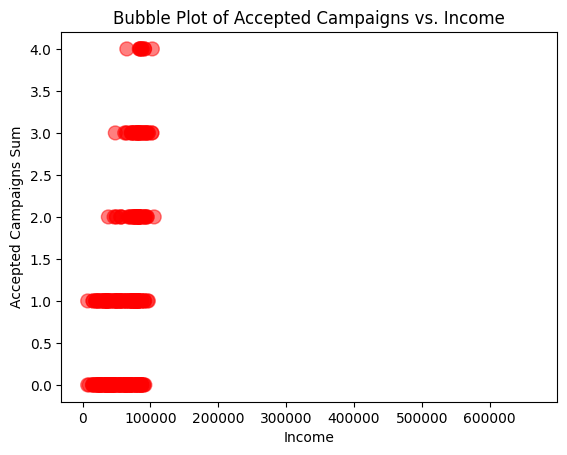

In [80]:
#plot a bubble plot of the Income against the AcceptedCmpSum column and use the Response column as the size of the bubbles
colors = df_marketing_campaign['Response'].map({0: 'blue', 1: 'red'})
plt.scatter(df_marketing_campaign['Income'], df_marketing_campaign['AcceptedCmpSum'], s=df_marketing_campaign['Response'] * 100, alpha=0.5, c=colors)
plt.xlabel('Income')
plt.ylabel('Accepted Campaigns Sum')
plt.title('Bubble Plot of Accepted Campaigns vs. Income')
plt.show()

In [81]:
df_marketing_campaign.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'AcceptedCmpSum'],
      dtype='object')

In [82]:
df_marketing_campaign.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,AcceptedCmpSum
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,0


In [83]:
#perform PCA on the df3 DataFrame
df_marketing_campaign = df_marketing_campaign.dropna()  # Ensure no NaN values for PCA
df_marketing_campaigndropPCA = df_marketing_campaign.drop(columns=['ID', 'Education', 'Marital_Status','Response'])
numeric_data = df_marketing_campaigndropPCA.select_dtypes(include=[np.number]).dropna()


pca3_df_marketing_campaign = decomposition.PCA(n_components = 3)
principal_components = pca3_df_marketing_campaign.fit_transform(df_marketing_campaign.select_dtypes(include=[np.number]))
print(pca3_df_marketing_campaign.explained_variance_ratio_)
print(pca3_df_marketing_campaign.components_)
pca_df_marketing_campaign = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3'])
print(pca_df_marketing_campaign)

[9.83436370e-01 1.63818243e-02 1.27844578e-04]
[[ 1.71845260e-03 -7.70309038e-05  9.99953706e-01 -9.14304110e-06
   4.13274221e-07 -4.57266447e-06  7.75474387e-03  6.81097331e-04
   5.20910927e-03  9.54568780e-04  7.19121948e-04  6.70881992e-04
  -6.35074009e-06  4.22354941e-05  6.85010330e-05  6.83623960e-05
  -5.32871690e-05 -1.67750353e-07  1.91819675e-06  3.47489014e-06
   2.69372475e-06  4.02020123e-07 -1.04781053e-07 -1.01114199e-28
  -7.59543164e-28  1.88924890e-06  8.32108141e-06]
 [ 9.99993333e-01  1.66958060e-05 -1.68944916e-03  1.24545929e-06
  -5.46416040e-07 -3.95029531e-04 -3.01239527e-03  1.86513759e-05
  -9.53017764e-04 -5.04053954e-04 -1.50064129e-04 -2.48678344e-04
  -2.33990581e-05 -2.00379191e-05 -9.22415995e-06 -2.02484397e-05
  -3.08388297e-07 -2.86905313e-06 -2.13333221e-06 -9.32598189e-07
  -1.65684565e-06 -5.76611432e-07  1.02979630e-06  4.94101611e-27
   2.26063815e-26 -2.56611201e-06 -8.16844061e-06]
 [ 3.17250463e-03 -2.31849394e-03 -9.16833464e-03 -6.170183

/Users/sudeemangalwadekar/.pyenv/versions/3.13.3/lib/python3.13/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Users/sudeemangalwadekar/.pyenv/versions/3.13.3/lib/python3.13/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/Users/sudeemangalwadekar/.pyenv/versions/3.13.3/lib/python3.13/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: invalid value encountered in matmul
  X_transformed = X @ self.components_.T


In [84]:
first_component = pca3_df_marketing_campaign.components_[0]
print("First Principal Component Weights:", first_component)
feature_names = numeric_data.select_dtypes(include=[np.number]).columns
for feature, weight in zip(feature_names, first_component):
    print(f"Feature: {feature}, Weight: {weight}")

First Principal Component Weights: [ 1.71845260e-03 -7.70309038e-05  9.99953706e-01 -9.14304110e-06
  4.13274221e-07 -4.57266447e-06  7.75474387e-03  6.81097331e-04
  5.20910927e-03  9.54568780e-04  7.19121948e-04  6.70881992e-04
 -6.35074009e-06  4.22354941e-05  6.85010330e-05  6.83623960e-05
 -5.32871690e-05 -1.67750353e-07  1.91819675e-06  3.47489014e-06
  2.69372475e-06  4.02020123e-07 -1.04781053e-07 -1.01114199e-28
 -7.59543164e-28  1.88924890e-06  8.32108141e-06]
Feature: Year_Birth, Weight: 0.0017184526037450553
Feature: Income, Weight: -7.703090375123014e-05
Feature: Kidhome, Weight: 0.9999537057136986
Feature: Teenhome, Weight: -9.143041095733608e-06
Feature: Recency, Weight: 4.132742208551262e-07
Feature: MntWines, Weight: -4.572664465005955e-06
Feature: MntFruits, Weight: 0.007754743874796468
Feature: MntMeatProducts, Weight: 0.0006810973309429243
Feature: MntFishProducts, Weight: 0.005209109273073291
Feature: MntSweetProducts, Weight: 0.000954568779551921
Feature: MntGoldP

***PCA Observation***
- The PCA reveals that the first principal component can explain 98% of variance in the Marketing campaign dataset.
- The features that significantly contributed to the First principal component explaining the variance in the dataset were Teenhome, Income, NumWebPurchases, NumStorePurchases and NumWebVisitsMonth.

In [85]:
# build a linear regression model to predict the Response column using the columns Income, MntWines, MntFruits, MntFishProducts, MntSweetProducts, MntGoldProds, NumWebPurchases, NumStorePurchases, NumCatalogPurchases, Complain, Z_Revenue
from sklearn.linear_model import LinearRegression
X = df_marketing_campaign[['Income', 'MntWines', 'MntFruits', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumWebPurchases', 'NumStorePurchases', 'NumCatalogPurchases', 'Complain', 'Z_Revenue']]
y = df_marketing_campaign['Response']

linear_model = LinearRegression()
linear_model.fit(X, y)
print("Coefficients for linear_model Respnose prediction:", linear_model.coef_)
print("Intercept for linear_model Respnose prediction:", linear_model.intercept_)
print("R^2 Score for linear_model Respnose prediction:", linear_model.score(X, y))   
print("Root mean squared error for linear_model Respnose prediction:", np.sqrt(mean_squared_error(y, linear_model.predict(X)))) 
X1 = df_marketing_campaign[['Income', 'MntWines', 'MntFruits', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumStorePurchases', 'NumCatalogPurchases', 'Complain', 'Z_Revenue']]
y1 = df_marketing_campaign['NumWebPurchases']

linear_model1 = LinearRegression()
linear_model1.fit(X1, y1)
print("Coefficients for linear_model Web Purchases prediction:", linear_model1.coef_)
print("Intercept for linear_model Web Purchases prediction:", linear_model1.intercept_)
print("R^2 Score for linear_model Web Purchases prediction:", linear_model1.score(X1, y1))  
print("Root mean squared error for linear_model Web Purchases prediction:", np.sqrt(mean_squared_error(y1, linear_model1.predict(X1)))) 


Coefficients for linear_model Respnose prediction: [-3.05240620e-07  2.97151577e-04  4.09970430e-04 -9.49707751e-05
  2.08586607e-04  2.85690452e-04  7.91804302e-03 -2.96613857e-02
  1.54276323e-02  3.42793751e-02  0.00000000e+00]
Intercept for linear_model Respnose prediction: 0.14831674016494703
R^2 Score for linear_model Respnose prediction: 0.10600739535429815
Root mean squared error for linear_model Respnose prediction: 0.33786599501182474
Coefficients for linear_model Web Purchases prediction: [ 3.62392101e-06  2.82387724e-03 -1.08182422e-03 -2.01921447e-03
  5.05862387e-03  1.04702438e-02  1.89086905e-01 -6.11473271e-02
  2.08144104e-01  0.00000000e+00]
Intercept for linear_model Web Purchases prediction: 1.6063248871889888
R^2 Score for linear_model Web Purchases prediction: 0.3848101975500462
Root mean squared error for linear_model Web Purchases prediction: 2.149353434724804


/Users/sudeemangalwadekar/.pyenv/versions/3.13.3/lib/python3.13/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/sudeemangalwadekar/.pyenv/versions/3.13.3/lib/python3.13/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/sudeemangalwadekar/.pyenv/versions/3.13.3/lib/python3.13/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/Users/sudeemangalwadekar/.pyenv/versions/3.13.3/lib/python3.13/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/sudeemangalwadekar/.pyenv/versions/3.13.3/lib/python3.13/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept

***Observation from training Linear models on Marketing Campaign Dataset***

- R^2 Score for linear_model predicting Response: 0.10600739535429815
- Root mean squared error for linear_model predicting Response: 0.33786599501182474

- R^2 Score for linear_model predicting Web Purchases: 0.3848101975500462
- Root mean squared error for linear_model predicting Web Purchases: 2.149353434724804

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 136-150 of the Storytelling With Data book as best you can. ("The power of super-categories" to the end of chapter 5). You do not have to get the exact data values right, just the overall look and feel.

/var/folders/5w/fbj6kr3j5pq252rgncmm87w80000gn/T/ipykernel_50282/224006869.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_counts = df_marketing_campaign['ID'].resample('M').count()


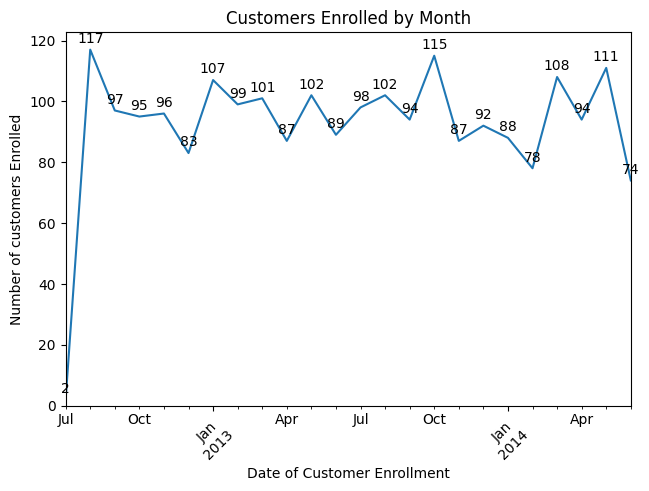

In [86]:
#line plot the count of IDs along Dt_customer column
df_marketing_campaign['Dt_Customer'] = pd.to_datetime(df_marketing_campaign['Dt_Customer'], format='%Y-%m-%d')
df_marketing_campaign.set_index('Dt_Customer', inplace=True)
monthly_counts = df_marketing_campaign['ID'].resample('M').count()

ax = monthly_counts.plot()
for date, count in monthly_counts.items():
    ax.annotate(f'{count}', xy=(date, count), xytext=(0, 5), textcoords='offset points', ha='center', fontsize=10, color='black')
plt.xticks(rotation=45)
plt.tight_layout()
plt.gca().set_ylim(bottom=0)  # Set y-axis to start from 0
plt.gca().set_xlim(left=monthly_counts.index.min(), right=monthly_counts.index.max())

plt.title('Customers Enrolled by Month')
plt.xlabel('Date of Customer Enrollment')
plt.ylabel('Number of customers Enrolled')
plt.show()